In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os.path import join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
from utils.pandas import apply_filters
from utils_local import read_spreadsheet, colors_v1, markers_v1

In [4]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})

### Load and preprocess CSV sheets

In [5]:
df = read_spreadsheet(gid_key="ss-v2-granularity")
df.dropna(inplace=True)


df_finetune = read_spreadsheet(gid_key="domain_shift_finetune", index_col=0)
df_finetune.sort_values("UCF101", inplace=True)

dfs = dict()
for gran in df.Granularity.unique():
    sdf = apply_filters(df, {"Granularity": gran})
    sdf = sdf.set_index("Method").loc[list(df_finetune.index)].reset_index()
    dfs[gran.split(" ")[0]] = sdf

In [6]:
dfs["Full"]

,Method,Granularity,Accuracy
0,None,Full (174),56.81
1,MoCo,Full (174),52.42
2,SeLaVi,Full (174),56.37
3,VideoMoCo,Full (174),58.75
4,Pretext-contrast,Full (174),54.03
5,RSPNet,Full (174),59.39
6,AVID-CMA,Full (174),53.82
7,CTP,Full (174),60.16
8,TCLR,Full (174),59.64
9,GDT,Full (174),57.78


### Plot `fine` vs `coarse`

In [7]:
dfs.keys()

dict_keys(['Full', 'Coarse', 'Common'])

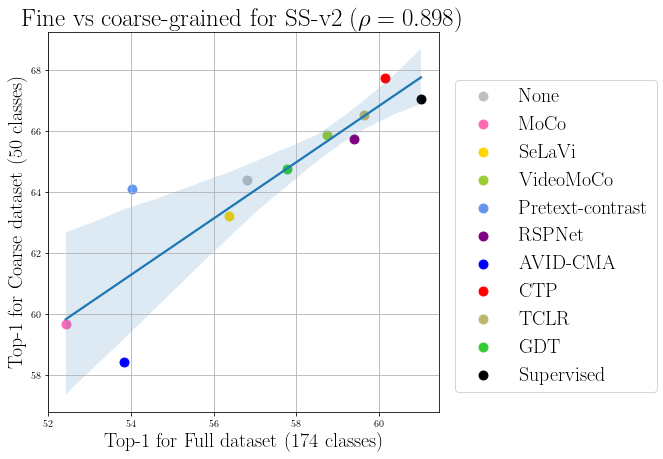

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

titlesize = 25
xlabelsize = 20
ylabelsize = 20
legendsize = 20
markersize = 80

ax.grid()

xvalues = dfs["Full"]["Accuracy"].values
yvalues = dfs["Coarse"]["Accuracy"].values
labels = dfs["Coarse"]["Method"].values
colors = colors_v1

for (x, y, l, c) in zip(xvalues, yvalues, labels, colors):
    ax.scatter(x, y, label=l, color=c, s=markersize)

sns.regplot(x=xvalues, y=yvalues, ax=ax, scatter=False)

ax.set_xlabel("Top-1 for Full dataset (174 classes)", fontsize=xlabelsize)
ax.set_ylabel("Top-1 for Coarse dataset (50 classes)", fontsize=ylabelsize)
corr = np.round(np.corrcoef(xvalues, yvalues)[0, 1], decimals=3)
corr = f"$\\rho = {corr}$"
ax.set_title("Fine vs coarse-grained for SS-v2 ({})".format(corr), fontsize=titlesize)

ax.legend(loc='upper center', bbox_to_anchor=(1.3, 0.9), fontsize=legendsize)
plt.show()

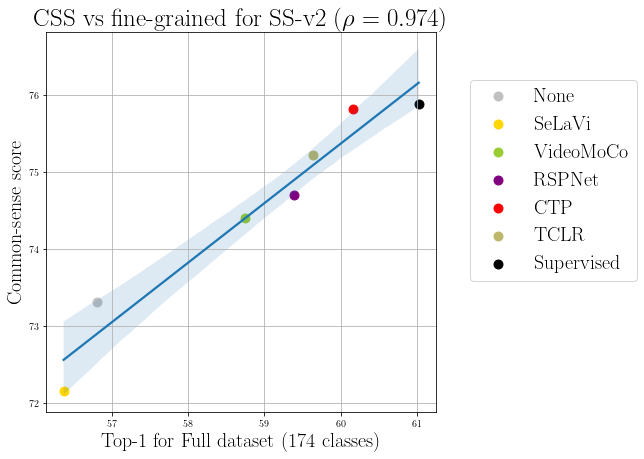

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

titlesize = 25
xlabelsize = 20
ylabelsize = 20
legendsize = 20
markersize = 80

ax.grid()

xvalues = dfs["Full"]["Accuracy"].values
yvalues = dfs["Common"]["Accuracy"].values
labels = dfs["Full"]["Method"].values
colors = colors_v1

# filter only methods for which we have common sense results
indices = yvalues != 0.
xvalues = xvalues[indices]
yvalues = yvalues[indices]
labels = labels[indices]
colors = np.array(colors)[indices]

for (x, y, l, c) in zip(xvalues, yvalues, labels, colors):
    ax.scatter(x, y, label=l, color=c, s=markersize)

sns.regplot(x=xvalues, y=yvalues, ax=ax, scatter=False)

ax.set_xlabel("Top-1 for Full dataset (174 classes)", fontsize=xlabelsize)
ax.set_ylabel("Common-sense score", fontsize=ylabelsize)
corr = np.round(np.corrcoef(xvalues, yvalues)[0, 1], decimals=3)
corr = f"$\\rho = {corr}$"
ax.set_title("CSS vs fine-grained for SS-v2 ({})".format(corr), fontsize=titlesize)

ax.legend(loc='upper center', bbox_to_anchor=(1.3, 0.9), fontsize=legendsize)
plt.show()